In [664]:
import pandas as pd
import numpy as np
import seaborn as sns
from streamlit_pandas_profiling import st_profile_report
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)
plt.style.use('seaborn')
%matplotlib inline

#Widgets libraries
import ipywidgets as wdpip
from IPython.display import display, clear_output
from ipywidgets import interactive

#Data Analysis Library
from pandas_profiling import ProfileReport

In [580]:
well_log=pd.read_csv('C:/Users/cheta/OneDrive - Georgia Institute of Technology/Desktop/Sound QI/Log Data.csv')

In [581]:
well_log.head()

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
0         73.215       0.7965         0.25  137.81  7256.3675  2799.0030   
1         69.152       0.7391         0.20  138.06  7243.2276  2804.5841   
2         65.965       0.6940         0.21  138.06  7243.2276  2817.0360   
3         68.215       0.7258         0.27  137.31  7282.7908  2839.0723   
4         70.840       0.7630         0.36  136.31  7336.2189  2870.3577   

   Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  
0   2.1278          -999.25                 0.2818        0.4126      2007  
1   2.1202          -999.25                 0.2893        0.4118      2008  
2   2.1149          -999.25                 0.2946        0.4109      2009  
3   2.1217          -999.25                 0.2889        0.4104      2010  
4   2.1301          -999.25                 0.2819        0.4096      2011

In [537]:
#Creating a profile report

profile_well_log=ProfileReport(well_log, title='Profiling Reoprt')
profile_well_log.to_notebook_iframe()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

https://www.youtube.com/watch?v=JwNwbu-g2m0

# Data Cleaning

Missing values in Gamma Ray column

In [582]:
well_log[well_log['GammaRay(API)'].isnull()]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
301            NaN       0.7965         0.25  137.81  7256.3675  2799.0030   
302            NaN       0.7391         0.20  138.06  7243.2276  2804.5841   
303            NaN       0.6940         0.21  138.06  7243.2276  2817.0360   
304            NaN       0.7258         0.27  137.31  7282.7908  2839.0723   
305            NaN       0.7630         0.36  136.31  7336.2189  2870.3577   
306            NaN       0.6415         0.52  134.31  7445.4620  2989.7909   
307            NaN       0.6327         0.70  127.78  7825.9509  3290.0682   
308            NaN       0.6384         0.79  125.78  7950.3896  3385.7098   
309            NaN       0.5932         0.72  126.28  7918.9104  3374.7286   
310            NaN       0.6428         0.61  123.78  8078.8496  3484.8607   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  
301   2.1278          -999.25                 0.2818        0.4126      2308  
302   2.1202          -999.25                 0.2893        0.4118      2309  
303   2.1149          -999.25                 0.2946        0.4109      2310  
304   2.1217          -999.25                 0.2889        0.4104      2311  
305   2.1301          -999.25                 0.2819        0.4096      2312  
306   2.1242          -999.25                 0.2911        0.4039      6313  
307   2.1513          -999.25                 0.2744        0.3927      6314  
308   2.1609          -999.25                 0.2681        0.3892      2315  
309   2.1533          -999.25                 0.2750        0.3890      2316  
310   2.1706          -999.25                 0.2618        0.3857      2317

It's not ideal that we had to drop those rows, especially considering they're all
sequential as far as the depth of the well is concerned. Since it seems like the
missing data is systematic --- all of the missing values are in the same column
this error could potentially bias our analysis.
Most frequently used approaches to handle the missing data are: 1. Do nothing
2. Drop entire row 3. Fill with the mean or median value of the measurement for
entire well section 4. Fill with the previous or the next value to missing entry
4. Interpolate between the neighbouring values(value just before and after the
missing entry) 5. Impute using k-NN
Depending on the used case you can decide which approach works the best. In this
case we will use the k-NN approach to fill the values. In the k-NN approach the
other available meaurements (Shale Volume, Resistivity, Sonic) will be used to
determine the likely values of Gamma Ray in the missing interval. Ref: Nearest
Neighbors Imputation (https://scikit-learn.org/stable/modules/impute.html#nearest-neighbors-imputation)


In [583]:
# k-NN to determine the missing Gamma Ray values
from sklearn.impute import KNNImputer
df=well_log.loc[:,['GammaRay(API)','ShaleVolume','Resistivity','Sonic']]
imputer=KNNImputer(n_neighbors=2,weights='uniform')
well_log['GammaRay_imputed']=imputer.fit_transform(df)[:,0]

In [584]:
well_log[well_log['GammaRay(API)'].isnull()]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
301            NaN       0.7965         0.25  137.81  7256.3675  2799.0030   
302            NaN       0.7391         0.20  138.06  7243.2276  2804.5841   
303            NaN       0.6940         0.21  138.06  7243.2276  2817.0360   
304            NaN       0.7258         0.27  137.31  7282.7908  2839.0723   
305            NaN       0.7630         0.36  136.31  7336.2189  2870.3577   
306            NaN       0.6415         0.52  134.31  7445.4620  2989.7909   
307            NaN       0.6327         0.70  127.78  7825.9509  3290.0682   
308            NaN       0.6384         0.79  125.78  7950.3896  3385.7098   
309            NaN       0.5932         0.72  126.28  7918.9104  3374.7286   
310            NaN       0.6428         0.61  123.78  8078.8496  3484.8607   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
301   2.1278          -999.25                 0.2818        0.4126      2308   
302   2.1202          -999.25                 0.2893        0.4118      2309   
303   2.1149          -999.25                 0.2946        0.4109      2310   
304   2.1217          -999.25                 0.2889        0.4104      2311   
305   2.1301          -999.25                 0.2819        0.4096      2312   
306   2.1242          -999.25                 0.2911        0.4039      6313   
307   2.1513          -999.25                 0.2744        0.3927      6314   
308   2.1609          -999.25                 0.2681        0.3892      2315   
309   2.1533          -999.25                 0.2750        0.3890      2316   
310   2.1706          -999.25                 0.2618        0.3857      2317   

     GammaRay_imputed  
301           70.9960  
302           67.5585  
303           67.5585  
304           67.5275  
305           71.0900  
306           61.9960  
307           61.6680  
308           61.0115  
309           63.1910  
310           64.3160

# Outliers or Incorrect values

Density column has some zero entries and the Depth also seems to have some
outlier values.


In [585]:
well_log[well_log['Density']==0]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
321         45.543       0.4036         0.37  132.31  7558.0077  3147.3555   
322         47.480       0.4310         0.44  127.28  7856.6939  3375.0354   
323         56.512       0.5594         0.55  119.03  8401.2434  3763.5865   
324         59.824       0.6065         0.68  116.03  8618.4607  3918.7153   
325         58.105       0.5820         0.65  118.03  8472.4223  3812.1862   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
321      0.0          -999.25                 0.3137        0.3951      2328   
322      0.0          -999.25                 0.2971        0.3869      2329   
323      0.0          -999.25                 0.2579        0.3745      2330   
324      0.0          -999.25                 0.2428        0.3697      2331   
325      0.0          -999.25                 0.2521        0.3731      2332   

     GammaRay_imputed  
321            45.543  
322            47.480  
323            56.512  
324            59.824  
325            58.105

Since there are very few entries which are zero. We can just replace the 0
density value with the last non zero density. In the below code snippet, method =
`ffill' replaces the 0 values with the last non zero density value.


In [586]:
well_log.Density.replace(0, method = 'ffill', inplace = True )

<AxesSubplot:>

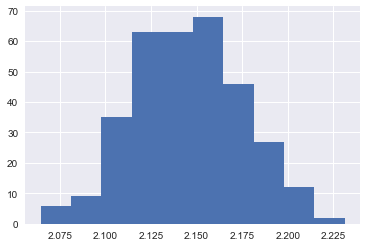

In [587]:
well_log['Density'].hist()

# Depth

<AxesSubplot:>

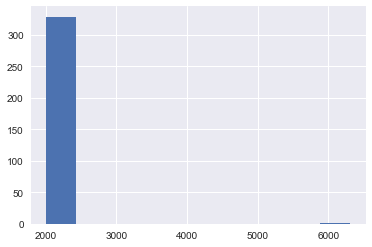

In [588]:
well_log['Depth(m)'].hist()

In [589]:
well_log[well_log['Depth(m)']>3000]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
306            NaN       0.6415         0.52  134.31  7445.4620  2989.7909   
307            NaN       0.6327         0.70  127.78  7825.9509  3290.0682   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
306   2.1242          -999.25                 0.2911        0.4039      6313   
307   2.1513          -999.25                 0.2744        0.3927      6314   

     GammaRay_imputed  
306            61.996  
307            61.668

In [590]:
well_log['Depth(m)'] = np.where(well_log['Depth(m)']>3000 , np.nan, well_log['Depth(m)'])

In [591]:
well_log[well_log['Depth(m)'].isnull()]

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
306            NaN       0.6415         0.52  134.31  7445.4620  2989.7909   
307            NaN       0.6327         0.70  127.78  7825.9509  3290.0682   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
306   2.1242          -999.25                 0.2911        0.4039       NaN   
307   2.1513          -999.25                 0.2744        0.3927       NaN   

     GammaRay_imputed  
306            61.996  
307            61.668

In [592]:
transformed_depth = well_log['Depth(m)'].interpolate(method = 'linear')
well_log['Depth(m)_imputed'] = transformed_depth

In [593]:
well_log.iloc[300:310,[10,12]]

Depth(m)  Depth(m)_imputed
300    2307.0            2307.0
301    2308.0            2308.0
302    2309.0            2309.0
303    2310.0            2310.0
304    2311.0            2311.0
305    2312.0            2312.0
306       NaN            2313.0
307       NaN            2314.0
308    2315.0            2315.0
309    2316.0            2316.0

In [594]:
# Now creating a df for analysis by only using the relevent columns

df=well_log.drop(columns=['NeutronPorosity','GammaRay(API)','Depth(m)'])
df

ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  Density  \
0         0.7965         0.25  137.81  7256.3675  2799.0030   2.1278   
1         0.7391         0.20  138.06  7243.2276  2804.5841   2.1202   
2         0.6940         0.21  138.06  7243.2276  2817.0360   2.1149   
3         0.7258         0.27  137.31  7282.7908  2839.0723   2.1217   
4         0.7630         0.36  136.31  7336.2189  2870.3577   2.1301   
..           ...          ...     ...        ...        ...      ...   
326       0.5153         0.50  126.78  7887.6794  3373.8286   2.1417   
327       0.5588         0.38  130.31  7674.0081  3192.8934   2.1315   
328       0.5882         0.31  130.56  7659.3137  3172.7241   2.1338   
329       0.5832         0.28  132.81  7529.5535  3072.4126   2.1237   
330       0.4251         0.31  131.56  7601.0946  3175.0315   2.1104   

     DensityPorosity(g/cc)  PoissonRatio  GammaRay_imputed  Depth(m)_imputed  
0                   0.2818        0.4126            73.215            2007.0  
1                   0.2893        0.4118            69.152            2008.0  
2                   0.2946        0.4109            65.965            2009.0  
3                   0.2889        0.4104            68.215            2010.0  
4                   0.2819        0.4096            70.840            2011.0  
..                     ...           ...               ...               ...  
326                 0.2857        0.3880            53.418            2333.0  
327                 0.2902        0.3953            56.480            2334.0  
328                 0.2874        0.3964            58.543            2335.0  
329                 0.2940        0.4001            58.199            2336.0  
330                 0.3093        0.3943            47.105            2337.0  

[331 rows x 10 columns]

In [595]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ShaleVolume            331 non-null    float64
 1   Resistivity            331 non-null    float64
 2   Sonic                  331 non-null    float64
 3   Vp(m/s)                331 non-null    float64
 4   Vs(m/s)                331 non-null    float64
 5   Density                331 non-null    float64
 6   DensityPorosity(g/cc)  331 non-null    float64
 7   PoissonRatio           331 non-null    float64
 8   GammaRay_imputed       331 non-null    float64
 9   Depth(m)_imputed       331 non-null    float64
dtypes: float64(10)
memory usage: 26.0 KB


#  Rock Type Analysis

For rock typing we can use any unsupervised clustering technique. k-means is
the most widely used clustering technique which samples the dataset into k
groups/clusters of equal variance by minimizing the criteria called Inertia or
within-cluster-sum-of-squares. Refer: sklearn-k-means-Clustering (https://scikit-learn.org/stable/modules/clustering.html#k-means)

Prior to implementation of k-means, the data needs to be normalized as otherwise
the clusters tend to separate along the variables with higher variance. Refer:
feature_scaling_k-means (https://stats.stackexchange.com/questions/21222/are-mean-normalization-and-feature-scaling-needed-for-k-means-clustering)

In [596]:
# Preprocessing the dataset
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans

X=df
scale = StandardScaler()
x_scaled = scale.fit_transform(X)
well_logs_scaled = pd.DataFrame(x_scaled)

In [597]:
well_logs_scaled

0         1         2         3         4         5         6  \
0    1.525335 -1.362374  1.586114 -1.499562 -1.665341 -0.583114  0.110804   
1    1.085456 -1.636873  1.627527 -1.534789 -1.646522 -0.836755  0.446994   
2    0.739836 -1.581973  1.627527 -1.534789 -1.604533 -1.013636  0.684568   
3    0.983532 -1.252575  1.503289 -1.428724 -1.530226 -0.786694  0.429064   
4    1.268611 -0.758478  1.337639 -1.285488 -1.424731 -0.506354  0.115286   
..        ...       ...       ...       ...       ...       ...       ...   
326 -0.629615  0.010117 -0.241003  0.192928  0.272992 -0.119218  0.285623   
327 -0.296257 -0.648679  0.343741 -0.379906 -0.337128 -0.459631  0.487337   
328 -0.070952 -1.032976  0.385153 -0.419300 -0.405140 -0.382871  0.361826   
329 -0.109270 -1.197675  0.757865 -0.767175 -0.743394 -0.719946  0.657673   
330 -1.320854 -1.032976  0.550803 -0.575380 -0.397359 -1.163818  1.343501   

            7         8         9  
0    1.814424  1.563166 -1.726826  
1    1.743425  1.102464 -1.716360  
2    1.663550  0.741090 -1.705895  
3    1.619176  0.996217 -1.695429  
4    1.548177  1.293866 -1.684963  
..        ...       ...       ...  
326 -0.368805 -0.681611  1.684963  
327  0.279064 -0.334412  1.695429  
328  0.376688 -0.100489  1.705895  
329  0.705060 -0.139495  1.716360  
330  0.190315 -1.397441  1.726826  

[331 rows x 10 columns]

In [598]:
inertias = []
clusters_list = range(1,11)
# Compute Inertia value for different number of cluster
for num_clusters in clusters_list:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=num_clusters , random_state=123)
    # Fit model to samples
    model.fit(well_logs_scaled)
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

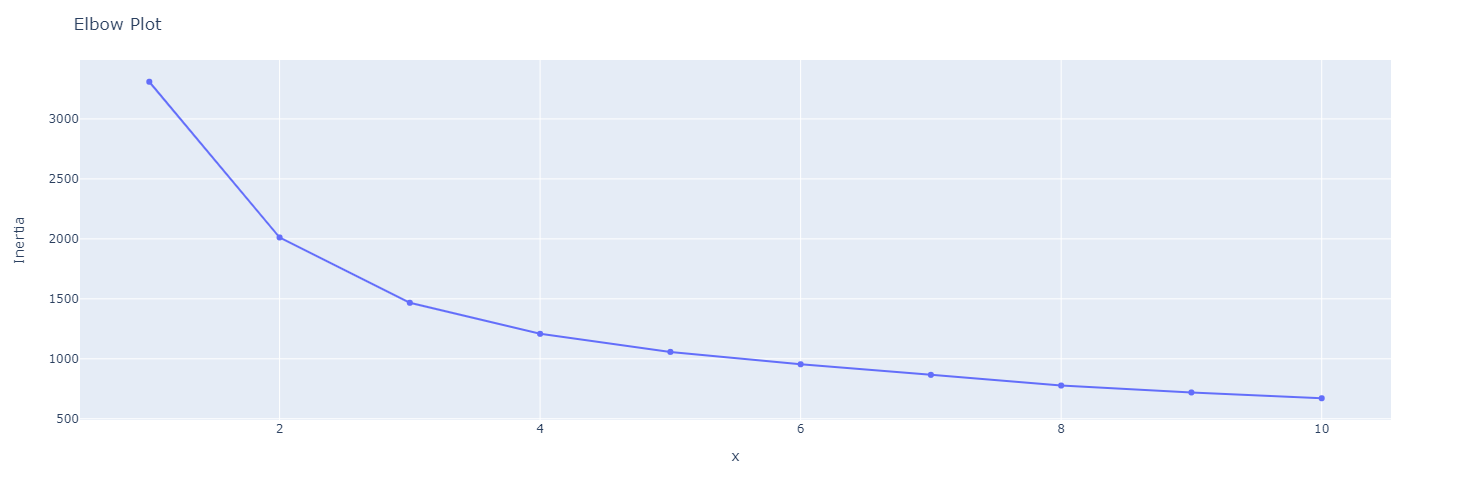

In [599]:
#Visualizing the Sales data for the region
fig=px.line(x=clusters_list, y=inertias).update_traces(mode='lines+markers')

fig.update_layout(showlegend=True, height=500, width=1000,title_text='Elbow Plot')

# Update axis properties
fig.update_yaxes(title_text='Inertia')
fig.show()

The Elbow method is used to choose the appropriate number of clusters. The target is to define the number of clusters such that the total intra cluster variation [or Inertia: total within-cluster sum of square (WSS)] is minimized that shows that the points within a cluster are similar to each other. The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn't improve much better the total WSS. In our case the maximum drop in the Inertia happens up to 3 clusters. After 3 the inertia drop is not very significant. We have sufficient evidence to go with k = 3. Let us now implement the k-means with 3 clusters and predict the 3 Rock types for the well section.

# KMeans 


In [600]:
# k-means implementation with 3 clusters
kmeans = KMeans(n_clusters=3)
kmeans.fit(well_logs_scaled)
labels_rocks = kmeans.predict(well_logs_scaled)
rocktypes = pd.DataFrame({'RockType':labels_rocks})
well_log['KMean'] = rocktypes.RockType

In [601]:
well_log

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
0           73.215       0.7965         0.25  137.81  7256.3675  2799.0030   
1           69.152       0.7391         0.20  138.06  7243.2276  2804.5841   
2           65.965       0.6940         0.21  138.06  7243.2276  2817.0360   
3           68.215       0.7258         0.27  137.31  7282.7908  2839.0723   
4           70.840       0.7630         0.36  136.31  7336.2189  2870.3577   
..             ...          ...          ...     ...        ...        ...   
326         53.418       0.5153         0.50  126.78  7887.6794  3373.8286   
327         56.480       0.5588         0.38  130.31  7674.0081  3192.8934   
328         58.543       0.5882         0.31  130.56  7659.3137  3172.7241   
329         58.199       0.5832         0.28  132.81  7529.5535  3072.4126   
330         47.105       0.4251         0.31  131.56  7601.0946  3175.0315   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
0     2.1278          -999.25                 0.2818        0.4126    2007.0   
1     2.1202          -999.25                 0.2893        0.4118    2008.0   
2     2.1149          -999.25                 0.2946        0.4109    2009.0   
3     2.1217          -999.25                 0.2889        0.4104    2010.0   
4     2.1301          -999.25                 0.2819        0.4096    2011.0   
..       ...              ...                    ...           ...       ...   
326   2.1417          -999.25                 0.2857        0.3880    2333.0   
327   2.1315          -999.25                 0.2902        0.3953    2334.0   
328   2.1338          -999.25                 0.2874        0.3964    2335.0   
329   2.1237          -999.25                 0.2940        0.4001    2336.0   
330   2.1104          -999.25                 0.3093        0.3943    2337.0   

     GammaRay_imputed  Depth(m)_imputed  KMean  
0              73.215            2007.0      1  
1              69.152            2008.0      1  
2              65.965            2009.0      1  
3              68.215            2010.0      1  
4              70.840            2011.0      1  
..                ...               ...    ...  
326            53.418            2333.0      2  
327            56.480            2334.0      2  
328            58.543            2335.0      2  
329            58.199            2336.0      2  
330            47.105            2337.0      2  

[331 rows x 14 columns]

t-SNE [1] is a tool to visualize high-dimensional data.
(https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)

In [559]:
from sklearn.manifold import TSNE
well_logs_scaled_embedded = TSNE(n_components=2,learning_rate=200,random_state=10,perplexity=50).fit_transform(well_logs_scaled)

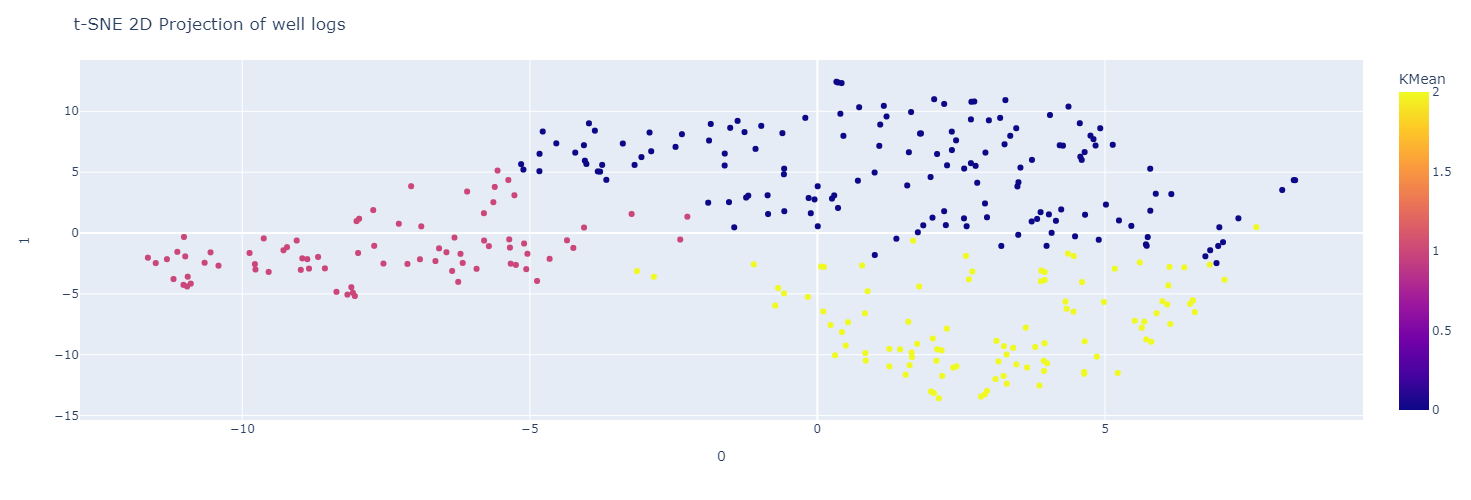

In [602]:
# Projecting the well log features into 2d projection using t-SNE

fig=px.scatter(well_logs_scaled_embedded,x=0, y=1, color=well_log.KMean, labels={'color': 'KMean'})

fig.update_layout(showlegend=True, height=500, width=1000,title_text='t-SNE 2D Projection of well logs')
fig.update_layout(showlegend=True,height=500, width=1000)
fig.show()

In [603]:
well_log

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
0           73.215       0.7965         0.25  137.81  7256.3675  2799.0030   
1           69.152       0.7391         0.20  138.06  7243.2276  2804.5841   
2           65.965       0.6940         0.21  138.06  7243.2276  2817.0360   
3           68.215       0.7258         0.27  137.31  7282.7908  2839.0723   
4           70.840       0.7630         0.36  136.31  7336.2189  2870.3577   
..             ...          ...          ...     ...        ...        ...   
326         53.418       0.5153         0.50  126.78  7887.6794  3373.8286   
327         56.480       0.5588         0.38  130.31  7674.0081  3192.8934   
328         58.543       0.5882         0.31  130.56  7659.3137  3172.7241   
329         58.199       0.5832         0.28  132.81  7529.5535  3072.4126   
330         47.105       0.4251         0.31  131.56  7601.0946  3175.0315   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
0     2.1278          -999.25                 0.2818        0.4126    2007.0   
1     2.1202          -999.25                 0.2893        0.4118    2008.0   
2     2.1149          -999.25                 0.2946        0.4109    2009.0   
3     2.1217          -999.25                 0.2889        0.4104    2010.0   
4     2.1301          -999.25                 0.2819        0.4096    2011.0   
..       ...              ...                    ...           ...       ...   
326   2.1417          -999.25                 0.2857        0.3880    2333.0   
327   2.1315          -999.25                 0.2902        0.3953    2334.0   
328   2.1338          -999.25                 0.2874        0.3964    2335.0   
329   2.1237          -999.25                 0.2940        0.4001    2336.0   
330   2.1104          -999.25                 0.3093        0.3943    2337.0   

     GammaRay_imputed  Depth(m)_imputed  KMean  
0              73.215            2007.0      1  
1              69.152            2008.0      1  
2              65.965            2009.0      1  
3              68.215            2010.0      1  
4              70.840            2011.0      1  
..                ...               ...    ...  
326            53.418            2333.0      2  
327            56.480            2334.0      2  
328            58.543            2335.0      2  
329            58.199            2336.0      2  
330            47.105            2337.0      2  

[331 rows x 14 columns]

## GMM
While KMeans assume spherical clusters, GMM can use it as an initialization and then make those clusters gaussian. Much better!

To make the comparison simple, we will use the same number of clusters in the Gaussian Mixture Model.

In [636]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import silhouette_score

In [657]:
gmm=GaussianMixture(n_components=3)
gmm.fit(well_logs_scaled)
labels_rocks1 = gmm.predict(well_logs_scaled)
rocktypes1 = pd.DataFrame({'RockType':labels_rocks1})
well_log['GMM'] = rocktypes1.RockType

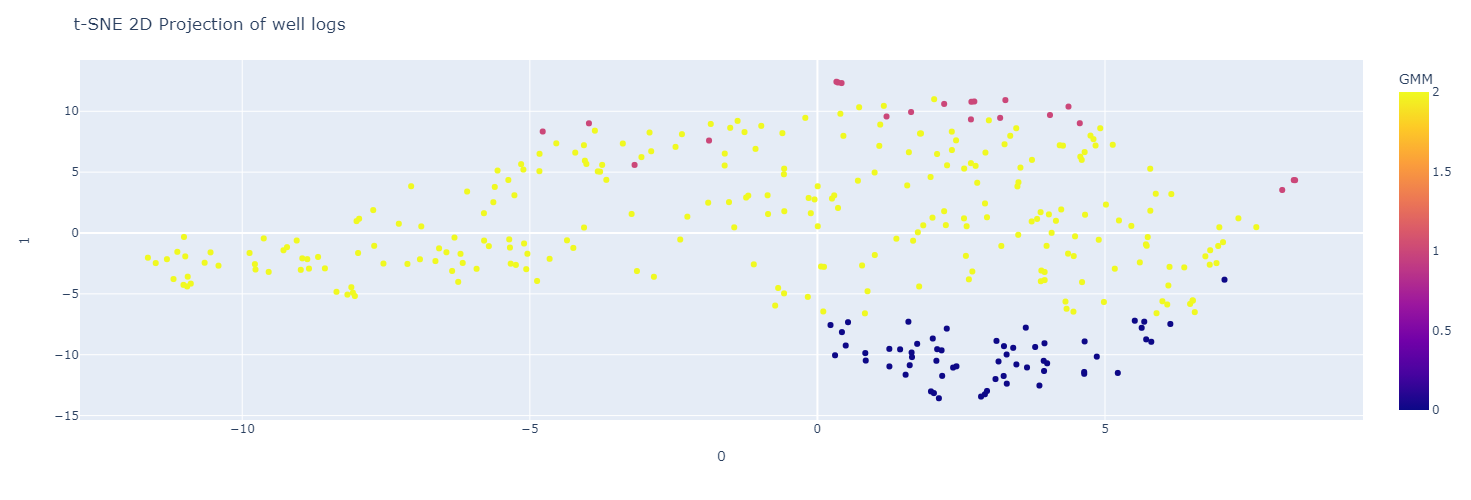

In [658]:
# Projecting the well log features into 2d projection using t-SNE

fig=px.scatter(well_logs_scaled_embedded,x=0, y=1, color=well_log.GMM, labels={'color': 'GMM'})

fig.update_layout(showlegend=True, height=500, width=1000,title_text='t-SNE 2D Projection of well logs')
fig.update_layout(showlegend=True,height=500, width=1000)
fig.show()

In [659]:
well_log

GammaRay(API)  ShaleVolume  Resistivity   Sonic    Vp(m/s)    Vs(m/s)  \
0           73.215       0.7965         0.25  137.81  7256.3675  2799.0030   
1           69.152       0.7391         0.20  138.06  7243.2276  2804.5841   
2           65.965       0.6940         0.21  138.06  7243.2276  2817.0360   
3           68.215       0.7258         0.27  137.31  7282.7908  2839.0723   
4           70.840       0.7630         0.36  136.31  7336.2189  2870.3577   
..             ...          ...          ...     ...        ...        ...   
326         53.418       0.5153         0.50  126.78  7887.6794  3373.8286   
327         56.480       0.5588         0.38  130.31  7674.0081  3192.8934   
328         58.543       0.5882         0.31  130.56  7659.3137  3172.7241   
329         58.199       0.5832         0.28  132.81  7529.5535  3072.4126   
330         47.105       0.4251         0.31  131.56  7601.0946  3175.0315   

     Density  NeutronPorosity  DensityPorosity(g/cc)  PoissonRatio  Depth(m)  \
0     2.1278          -999.25                 0.2818        0.4126    2007.0   
1     2.1202          -999.25                 0.2893        0.4118    2008.0   
2     2.1149          -999.25                 0.2946        0.4109    2009.0   
3     2.1217          -999.25                 0.2889        0.4104    2010.0   
4     2.1301          -999.25                 0.2819        0.4096    2011.0   
..       ...              ...                    ...           ...       ...   
326   2.1417          -999.25                 0.2857        0.3880    2333.0   
327   2.1315          -999.25                 0.2902        0.3953    2334.0   
328   2.1338          -999.25                 0.2874        0.3964    2335.0   
329   2.1237          -999.25                 0.2940        0.4001    2336.0   
330   2.1104          -999.25                 0.3093        0.3943    2337.0   

     GammaRay_imputed  Depth(m)_imputed  KMean  GMM  
0              73.215            2007.0      1    2  
1              69.152            2008.0      1    2  
2              65.965            2009.0      1    2  
3              68.215            2010.0      1    2  
4              70.840            2011.0      1    2  
..                ...               ...    ...  ...  
326            53.418            2333.0      2    2  
327            56.480            2334.0      2    2  
328            58.543            2335.0      2    2  
329            58.199            2336.0      2    2  
330            47.105            2337.0      2    0  

[331 rows x 15 columns]

# Plot well logs

In [660]:
# Display the well logs

def well_log_display(top_depth,bottom_depth,df,list_columns):
    
    #section of the log to plot
    sec=df[(df['Depth(m)_imputed']>=top_depth) & (df['Depth(m)_imputed']<=bottom_depth)]
    
    fig=make_subplots(rows=1,cols=len(list_columns), shared_yaxes=True)
    
    for i in range(len(list_columns)):
        if (list_columns[i]!='KMean') & (list_columns[i]!='Resistivity') & (list_columns[i]!='GMM'):
            fig.append_trace(go.Scatter(x=sec[list_columns[i]], y=sec['Depth(m)_imputed'], name=list_columns[i]), row=1, col=i+1)
        
            # Update axis properties
            fig.update_xaxes(title_text=list_columns[i], row=1, col=i+1)
            
        elif (list_columns[i]=='Resistivity'):
            fig.append_trace(go.Scatter(x=sec[list_columns[i]], y=sec['Depth(m)_imputed'],name=list_columns[i]), row=1, col=i+1)
        
            # Update axis properties
            fig.update_xaxes(title_text=list_columns[i], row=1, col=i+1, type='log', range=[-1,.1])
            
        elif (list_columns[i]=='KMean'):
            fig.append_trace(go.Bar(x=sec[list_columns[i]]+2, y=sec['Depth(m)_imputed'],name=list_columns[i],orientation='h', marker=dict(color=sec[list_columns[i]], coloraxis="coloraxis"),marker_coloraxis=None), row=1, col=i+1)
            
            # Update axis properties
            fig.update_xaxes(title_text='KMean',range=[0,max(sec['KMean'])],row=1, col=i+1, showticklabels=False)
            
        else:
            fig.append_trace(go.Bar(x=sec[list_columns[i]]+2, y=sec['Depth(m)_imputed'],name=list_columns[i],orientation='h', marker=dict(color=sec[list_columns[i]], coloraxis="coloraxis"),marker_coloraxis=None), row=1, col=i+1)
            
            # Update axis properties
            fig.update_xaxes(title_text='GMM',range=[0,max(sec['GMM'])],row=1, col=i+1, showticklabels=False)
            
    layout = go.Layout(xaxis=dict(side='top'),xaxis2=dict(side='top'),xaxis3=dict(side='top'),xaxis4=dict(side='top'),xaxis5=dict(side='top'),xaxis6=dict(side='top'))
    fig['layout'].update(layout)      
    fig.update_yaxes(title_text='Depth', autorange="reversed", row=1, col=1)      
    fig.update_layout(showlegend=False, height=1500, width=1500)
    fig.show()


In [661]:
list_columns = ['ShaleVolume', 'Resistivity', 'GammaRay_imputed','Density','KMean','GMM']

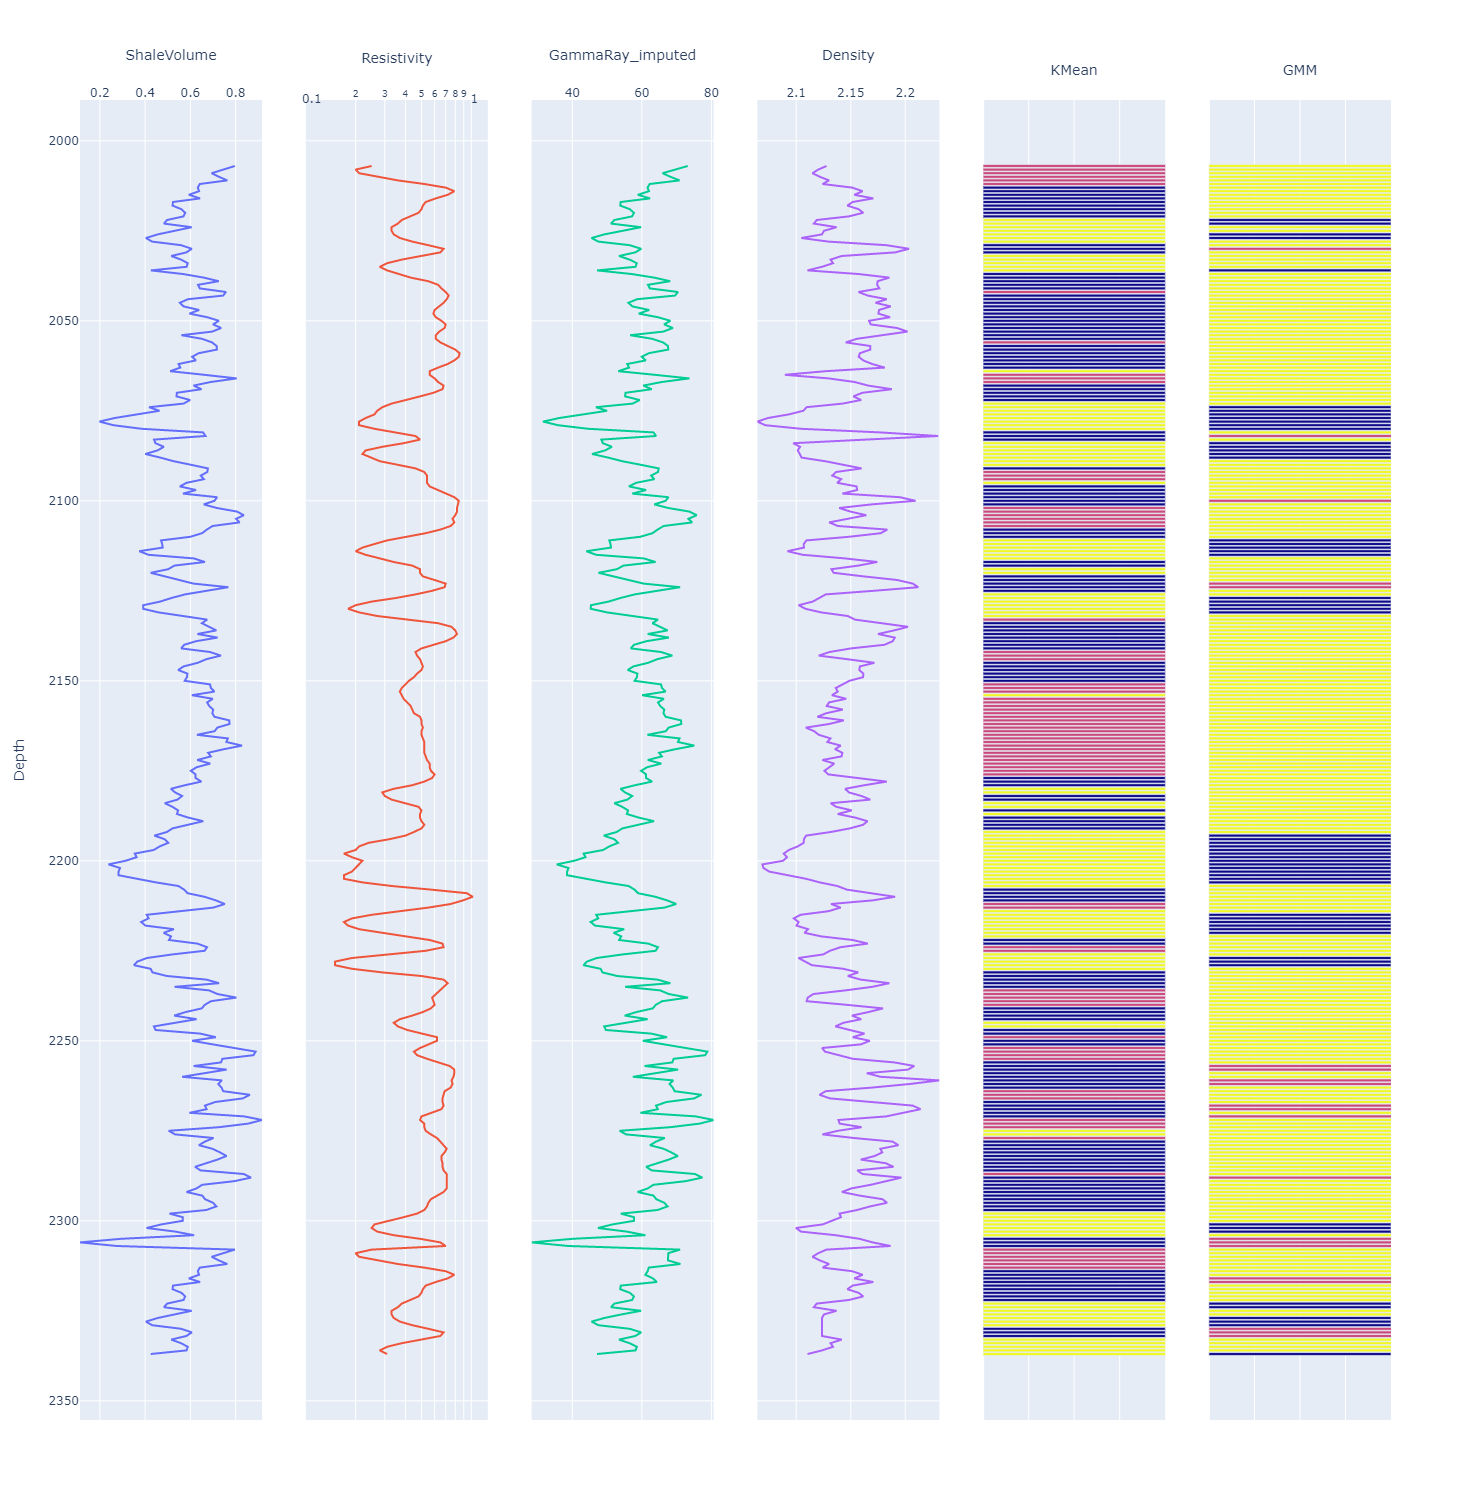

In [662]:
well_log_display(well_log['Depth(m)_imputed'].min(),well_log['Depth(m)_imputed'].max(), well_log, list_columns)